<a href="https://colab.research.google.com/github/amanagr6697/Hand-Digit-Recognition/blob/main/Hand_Written_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Loading libraries 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
#Loading dataset
mnist_dataset=keras.datasets.mnist

In [5]:
#Taking testing and training data
(train_x,train_y),(test_x,test_y)=mnist_dataset.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
train_x.shape
test_x.shape

(10000, 28, 28)

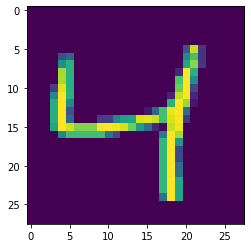

In [7]:
#Printing and checking
plt.imshow(train_x[2])

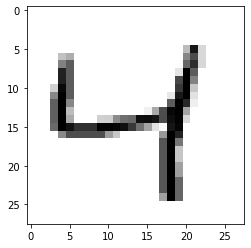

In [8]:
#Using cmap to convert rgb to binary
plt.imshow(train_x[2],cmap=plt.cm.binary)

In [9]:
#Here actually colors are reversed and actually 4 is as white image on black background
print(train_x[2])

#Now normalizing it to have values b/w 0 and 1 only instead of 0 to 255 that is /255
train_x=keras.utils.normalize(train_x,axis=1)  #Here axis is of not much use as image is square shape so 0/1 both would work fine
test_x=keras.utils.normalize(test_x,axis=1)

print(train_x[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [10]:
#Reshaping it to 4 dimensions to be able to get handled by Keras API 
train_x_reshape=np.array(train_x).reshape(-1,28,28,1) #-1 represents to apply operation to all
test_x_reshape=np.array(test_x).reshape(-1,28,28,1)
test_x_reshape.shape

(10000, 28, 28, 1)

In [11]:
from keras.engine import input_layer
#Creating a Deep Neural Network
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten, Conv2D, MaxPooling2D

#Initializing a neural network now
digit_model=Sequential()

#First Convolutional layer 
#Putting input layer from 1 to end as first has number of samples and it would automatically iterate over all, we just need to provide for only 1.
digit_model.add(Conv2D(64,(3,3),input_shape=train_x_reshape.shape[1:]))

#helps in making non linear and dropping all values less than 0, if any, and allows all >0 to move to next layer
digit_model.add(Activation("relu"))

#Downsizing values by using maxpooling2d on 2x2 matrix which gives max over 2x2 matrices
digit_model.add(MaxPooling2D(pool_size=(2,2)))


#Second Convolutional layer to have better training
digit_model.add(Conv2D(64,(3,3)))
digit_model.add(Activation("relu"))
digit_model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
#Now flattening layers from 2D to 1D as it works on 1D matrix, eg if 28x28 matrix converts to 28*28=784 elements in 1D
digit_model.add(Flatten())
digit_model.add(Dense(64));
digit_model.add(Activation("relu"))
digit_model.add(Dropout(0.2))  #To prevent overfitting

digit_model.add(Dense(32));
digit_model.add(Activation("relu"))
digit_model.add(Dropout(0.2))

#Final fully connected layer having number of classes = number of outputs, 10 in this case
digit_model.add(Dense(10));
digit_model.add(Activation("softmax"))  #When multiclass outputs, gives class probablities, when binary use sigmoid


In [13]:
digit_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [14]:
digit_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [15]:
len(train_x_reshape)

60000

In [16]:
#Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

#Earlystopping: stop executing when monitoring metric stopped improving
stop=EarlyStopping(monitor='val_acc',min_delta=0.01,patience=2,verbose=1)
#ModelCheckPoint to save the best model
modelch=ModelCheckpoint('/content/bestmodelachieved.h5',monitor='val_acc',verbose=1,save_best_only=True)


In [17]:
mod=digit_model.fit(train_x_reshape,train_y,epochs=5,validation_split=0.3,callbacks=[stop,modelch])

Epoch 1/5
1313/1313 [==============================] - 66s 49ms/step - loss: 0.3630 - accuracy: 0.8899 - val_loss: 0.0896 - val_accuracy: 0.9737
Epoch 2/5
1313/1313 [==============================] - 65s 50ms/step - loss: 0.1230 - accuracy: 0.9666 - val_loss: 0.0691 - val_accuracy: 0.9817
Epoch 3/5
1313/1313 [==============================] - 65s 49ms/step - loss: 0.0889 - accuracy: 0.9756 - val_loss: 0.0743 - val_accuracy: 0.9798
Epoch 4/5
1313/1313 [==============================] - 87s 66ms/step - loss: 0.0711 - accuracy: 0.9799 - val_loss: 0.0478 - val_accuracy: 0.9866
Epoch 5/5
1313/1313 [==============================] - 86s 65ms/step - loss: 0.0574 - accuracy: 0.9837 - val_loss: 0.0559 - val_accuracy: 0.9856


In [18]:
#Now lets check accuracy for testing data set

loss_val, accuracy_val=digit_model.evaluate(test_x_reshape,test_y)
print(loss_val)
print(accuracy_val)

313/313 [==============================] - 4s 13ms/step - loss: 0.0452 - accuracy: 0.9875
0.04520765691995621
0.987500011920929


In [19]:
len(test_x_reshape)

10000

In [20]:
predicted_values=digit_model.predict([test_x_reshape])

[5.1333755e-09 3.9888741e-09 2.7327394e-09 1.0063284e-06 3.2485470e-05
 5.3849649e-06 8.6417568e-11 3.2985160e-06 6.8313636e-07 9.9995708e-01]
9


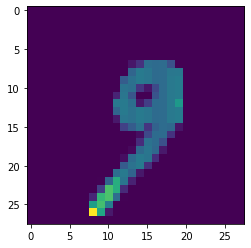

In [21]:
print(predicted_values[1000])
plt.imshow(test_x[1000])
print(np.argmax(predicted_values[1000]))

In [22]:
predicted_y_digits=[np.argmax(i) for i in predicted_values]

In [23]:
print(predicted_y_digits[103:115])
print(test_y[103:115])

#Pretty Perfect

[4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7]
[4 9 9 2 1 9 4 8 7 3 9 7]


In [24]:
#Confusion matrix for raw visualization
conf_matrix=tf.math.confusion_matrix(labels=test_y,predictions=predicted_y_digits)
print(conf_matrix)

#Pretty fine

tf.Tensor(
[[ 975    1    0    0    0    0    2    2    0    0]
 [   0 1132    3    0    0    0    0    0    0    0]
 [   3    0 1023    0    1    0    1    3    1    0]
 [   0    0    2  994    0    6    0    5    2    1]
 [   1    0    0    0  974    0    4    0    0    3]
 [   2    0    0    7    1  878    1    1    1    1]
 [   7    3    1    0    2    3  939    0    3    0]
 [   0    4    4    1    1    0    0 1015    1    2]
 [   3    1    1    1    3    1    0    1  956    7]
 [   2    4    0    0    6    1    0    7    0  989]], shape=(10, 10), dtype=int32)


Text(0.5, 256.19999999999993, 'True Digit')

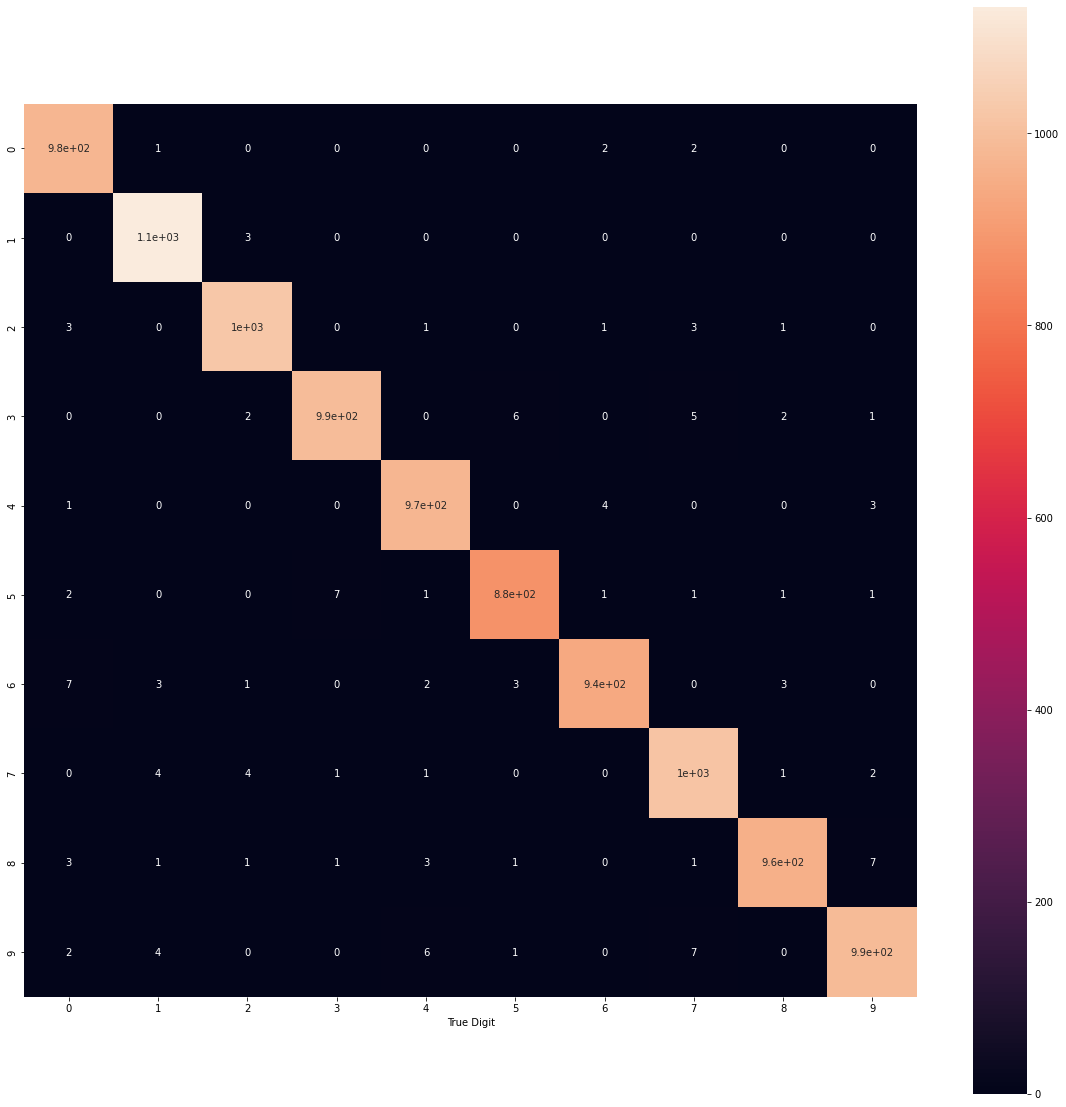

In [29]:
#Plotting confusion matrix for better visualisation
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(conf_matrix, cbar=True, square=True, annot=True)
plt.xlabel("Predicted Digit")
plt.xlabel("True Digit")

(1, 28, 28, 1)

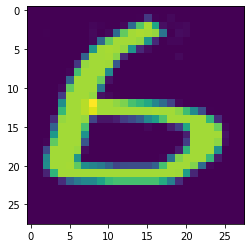

In [32]:
#Now manually checking by my own values
import cv2
image=cv2.imread('/content/Untitled.png')
plt.imshow(image)

#Converting to gray from RGB
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

gray_image.shape #648 1152

#converting to 28x28
resized_image=cv2.resize(gray_image,(28,28), interpolation=cv2.INTER_AREA)
plt.imshow(resized_image)

#Converting to model readable format
normalized_image=keras.utils.normalize(resized_image,axis=1)
normalized_image=np.array(normalized_image).reshape(-1,28,28,1) #Adding 1 more dimesnion for kernel operation
normalized_image.shape

In [36]:
check=digit_model.predict(normalized_image)
print("Predicted Digit: "+str(np.argmax(check)))

Predicted Digit: 6
